<a href="https://colab.research.google.com/github/kentokura/image-contrast-adjustment/blob/master/image_contrast_adjustment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

モジュールやデータのインポート

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

from google.colab.patches import cv2_imshow
from google.colab import drive
from IPython.display import Image, display_png

# 自分のgoogle driveのデータを使いたい場合は以下のコメントアウトを外す
# drive.mount('/content/drive')

# リポジトリをクローンする
!git clone https://github.com/kentokura/image-contrast-adjustment.git
# 確認
!ls image-contrast-adjustment/images

fatal: destination path 'image-contrast-adjustment' already exists and is not an empty directory.
Aerial.bmp    Balloon.bmp  Earth.bmp  Lenna.bmp     milkdrop.bmp  Pepper.bmp
Airplane.bmp  couple.bmp   Girl.bmp   Mandrill.bmp  Parrots.bmp   Sailboat.bmp


画像の確認

今回は[SIDBA](http://www.ess.ic.kanagawa-it.ac.jp/app_images_j.html)(Standard Image Data BAse)のLennaの画像を用いる

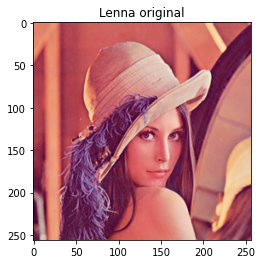

In [20]:
bgr = cv2.imread(filename='image-contrast-adjustment/images/Lenna.bmp',
                      flags=cv2.IMREAD_COLOR)
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.title("Lenna original")
plt.show()

ヒストグラムの可視化

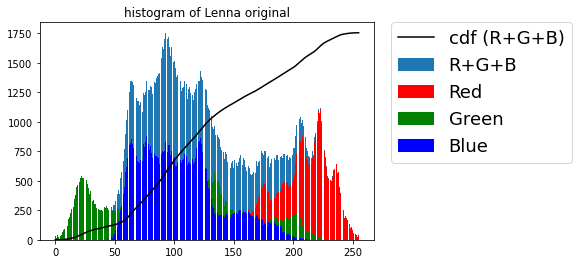

In [22]:
# R+G+B
hist_RGB, bins = np.histogram(a=rgb.flatten(), bins=256, range=[0, 256])
h = [h for h in range(len(hist_RGB))]
plt.bar(h, hist_RGB, label="R+G+B")
# R
hist_R, bins = np.histogram(a=rgb[:,:,0], bins=256, range=[0, 256])
plt.bar(h, hist_R, color="r", label="Red")
# G
hist_G, bins = np.histogram(a=rgb[:,:,1], bins=256, range=[0, 256])
plt.bar(h, hist_G, color="g", label="Green")
# B
hist_B, bins = np.histogram(a=rgb[:,:,2], bins=256, range=[0, 256])
plt.bar(h, hist_B, color="b", label="Blue")

# cdf(階調変換関数)
cdf = hist_RGB.cumsum() # リスト順に累積したリストを返す
cdf_normalized = cdf * hist_RGB.max() / cdf.max()
plt.plot(cdf_normalized, color = 'black', label='cdf (R+G+B)')
plt.title("histogram of Lenna original")
# 凡例
plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0,
    fontsize=18)

plt.show()

ヒストグラム均等化

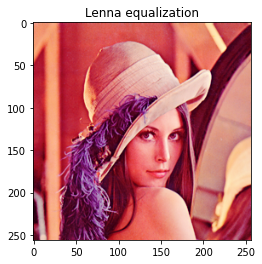

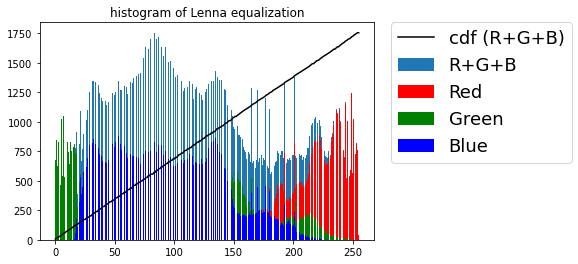

In [23]:
# 均等化処理
cdf_m = np.ma.masked_equal(cdf, 0) # まずヒストグラム内の最小値を見つける(0を除く)
# 均等化の処理を計算
# 処理はすべてマスクされていない要素にだけ作用する
cdf_m = (cdf_m - cdf_m.min())*255 / (cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
# 計算結果配列から画素値を取り出す
rgb2 = cdf[rgb]

# 均等化後のヒストグラム
hist2, bins2 = np.histogram(rgb2, 256, [0, 256])
cdf2 = hist2.cumsum()
cdf_normalized2 = cdf2 * hist2.max() / cdf2.max()

# 均等化後
plt.imshow(rgb2)
plt.title("Lenna equalization")
plt.show()

# R+G+B
hist_RGB, bins = np.histogram(a=rgb2.flatten(), bins=256, range=[0, 256])
h = [h for h in range(len(hist_RGB))]
plt.bar(h, hist_RGB, label="R+G+B")
# R
hist_R, bins = np.histogram(a=rgb2[:,:,0], bins=256, range=[0, 256])
plt.bar(h, hist_R, color="r", label="Red")
# G
hist_G, bins = np.histogram(a=rgb2[:,:,1], bins=256, range=[0, 256])
plt.bar(h, hist_G, color="g", label="Green")
# B
hist_B, bins = np.histogram(a=rgb2[:,:,2], bins=256, range=[0, 256])
plt.bar(h, hist_B, color="b", label="Blue")

# cdf(階調変換関数)
plt.plot(cdf_normalized2, color = 'black', label='cdf (R+G+B)')
plt.title("histogram of Lenna equalization")
# 凡例
plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0,
    fontsize=18)

plt.show()